## Kernel PCA

## Importing the dataset

In [1]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[, 3:5]
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


## Splitting the dataset into the Training set and Test set

In [2]:
library(caTools)
set.seed(123)

split = sample.split(dataset$Purchased, SplitRatio=0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [3]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,19,19000,0
3,26,43000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
10,35,65000,0


## Feature Scaling

In [4]:
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

In [5]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


### Applying Kernel PCA

In [6]:
# install.packages('kernlab')

In [7]:
library(kernlab)

kpca = kpca(~., data=training_set[-3], kernel='rbfdot', features=2)
training_set_pca = as.data.frame(predict(kpca, training_set))
training_set_pca$Purchased = training_set$Purchased
test_set_pca = as.data.frame(predict(kpca, test_set))
test_set_pca$Purchased = test_set$Purchased

In [8]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


## Fitting Logistic Regression to the Training set

In [9]:
classifier = glm(formula=Purchased ~ .,
                 family=binomial,
                 data=training_set_pca)
classifier


Call:  glm(formula = Purchased ~ ., family = binomial, data = training_set_pca)

Coefficients:
(Intercept)           V1           V2  
    -1.2756       0.4792       0.1437  

Degrees of Freedom: 299 Total (i.e. Null);  297 Residual
Null Deviance:	    390.9 
Residual Deviance: 191.1 	AIC: 197.1

## Predicting the Test set results

In [10]:
prob_pred = predict(classifier, type = 'response', newdata = test_set_pca[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)
head(data.frame(y_test=test_set_pca[3], y_pred=y_pred))

,Purchased,y_pred
2,0,0
4,0,0
5,0,0
9,0,0
12,0,0
18,1,0


## Making the Confusion Matrix

In [11]:
cm = table(test_set_pca[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 10 26

## Visualising the Training set results

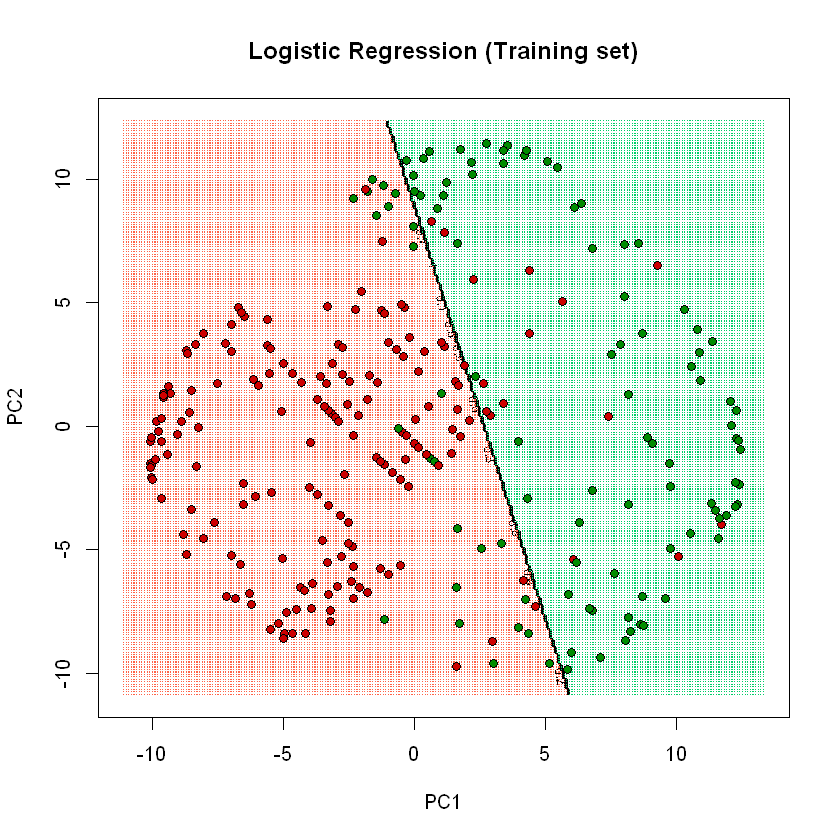

In [12]:
set = training_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.1)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.1)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type='response', newdata=grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)

plot(set[, -3],
     main='Logistic Regression (Training set)',
     xlab='PC1', ylab='PC2',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'green4', 'red3'))

## Visualising the Test set results

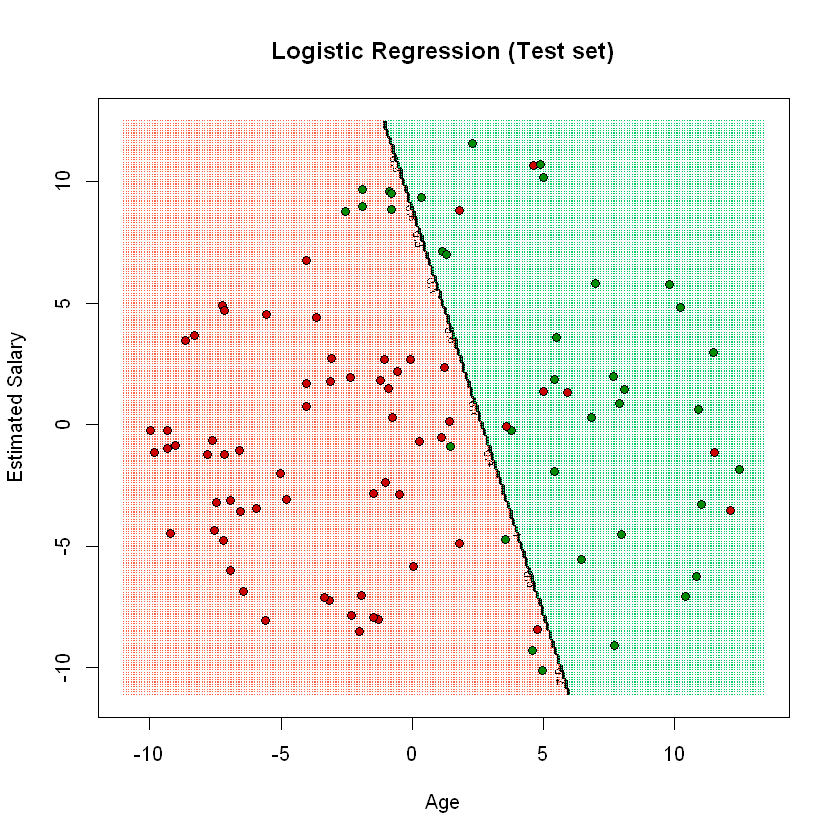

In [13]:
set = test_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.1)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.1)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type='response', newdata=grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)

plot(set[, -3],
     main='Logistic Regression (Test set)',
     xlab='Age', ylab='Estimated Salary',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'green4', 'red3'))